In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from grid.classify_grid import *
import os, ebf
from astropy.io import ascii
import time
#import mwdust

In [3]:
model=ebf.read('/Users/petigura/Research/CKS-Physical/data/mesa.ebf')

In [4]:
# prelims to manipulate some model variables (to be automated soon ...)
model['rho']=np.log10(model['rho'])
# next line turns off Dnu scaling relation corrections
model['fdnu'][:]=1.
model['avs']=np.zeros(len(model['teff']))
model['dis']=np.zeros(len(model['teff']))

teff 214642
feh 8314
number of models used within non-phot obsconstraints: 8314
number of models after phot constraints: 8314
----


teff 5314.86918676 63.0521650446 59.5678733315
logg 4.51062022452 0.0379593562421 0.0422121678763
feh 0.0173992618937 0.0394171314966 0.0467653322186
rad 0.856244992231 0.0351897821627 0.0304348428695
mass 0.871706352683 0.0257725899364 0.0259962891016
rho 1.37807560996 0.175218742178 0.176958953325
lum 0.528587770077 0.0556994901048 0.0527990790856
age 6.54454459896 3.7686007511 3.62023767729
:c


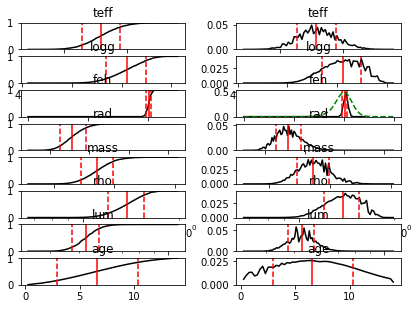

In [5]:
x=obsdata()
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
x.addspec([5322,4.51,0.04],[60.,0.05,0.04])
# numax & Dnu + uncertainties
#x.addseismo([1240.,63.5],[70.,1.5])
# 2MASS photometry 
#x.addjhk([-99,-99,10.0],[0,0,0.02])
# Sloan photometry
#x.addgriz([11.776,11.354,11.238,11.178],[0.02,0.02,0.02,0.02])
paras=classify(input=x,model=model,dustmodel=0.,useav=0.5)